# K-Means Clustering Handwriting Example

## Import Packages

In [17]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

## Import and Inspect Data

In [30]:
## Load Data
digits = datasets.load_digits()

## Inspect Data
#print(digits)
#print(digits.DESCR)
print(digits.data)
print(len(digits.data))
print(digits.target)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
1797
[0 1 2 ... 8 9 8]


## Create Train and Test Sets

In [31]:
# Train on the first 10000 images:
train_x = digits.data[:1438]
train_y = digits.target[:1438]

# Test on the next 100 images:
test_x = digits.data[1438:]
expected = digits.target[1438:].tolist()

## Visualize Data

<Figure size 432x288 with 0 Axes>

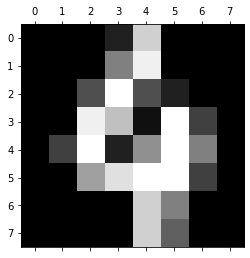

4


In [32]:
#Check one data point at index 100:
plt.gray()
plt.matshow(digits.images[100])
plt.show()
print(digits.target[100])

The handwritten number at the 100th observation is a 4.

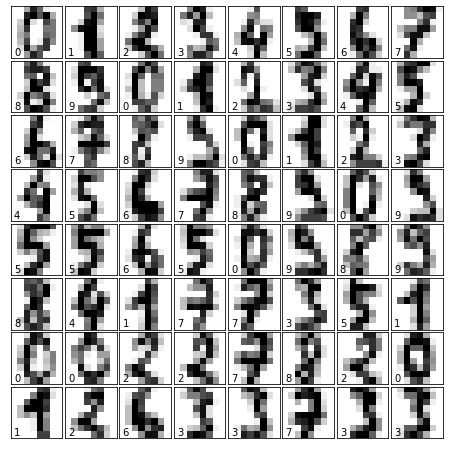

In [33]:
# Check multiple data points

# Figure size (width, height)
fig = plt.figure(figsize=(6, 6))
# Adjust the subplots 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
# For each of the 64 images
for i in range(64):
    # Initialize the subplots: add a subplot in the grid of 8 by 8, at the i+1-th position
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    # Display an image at the i-th position
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
  #  # Label the image with the target value
    ax.text(0, 7, str(digits.target[i]))
plt.show()


Here are some more of what the data points will look like.  Some of these numbers are even hard for a human to figure out, can a computer do it?

## Fit Model

In [34]:
model = KMeans(10, random_state = 100)
model.fit(train_x, train_y)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

## Visualize Model

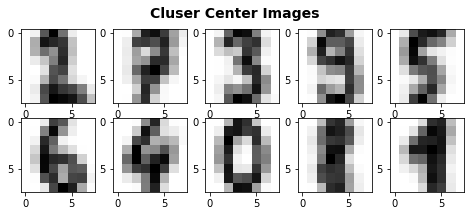

In [35]:
fig = plt.figure(figsize = (8,3))
fig.suptitle('Cluser Center Images', fontsize=14, fontweight='bold')
for i in range(10):
  # Initialize subplots in a grid of 2X5, at i+1th position
  ax = fig.add_subplot(2, 5, 1 + i)
  # Display images
  ax.imshow(model.cluster_centers_[i].reshape((8, 8)), cmap=plt.cm.binary)

plt.show()

## Predict New Values

In [36]:
new_samples = np.array([
[0.00,1.83,6.48,6.79,2.90,0.00,0.00,0.00,0.08,6.33,6.86,6.41,7.63,2.74,0.00,0.00,3.81,7.62,2.67,0.23,5.95,7.39,1.07,0.00,6.94,5.64,0.00,0.00,0.99,7.55,3.58,0.00,7.62,1.99,0.00,0.00,1.60,7.40,3.81,0.00,7.62,0.38,0.00,2.36,7.02,6.79,0.76,0.00,7.62,2.37,2.97,7.55,6.41,1.15,0.00,0.00,7.17,7.32,7.63,6.25,0.54,0.00,0.00,0.00],
[0.00,0.76,7.55,7.62,7.63,2.52,0.00,0.00,0.00,3.05,7.62,5.80,7.62,3.81,0.00,0.00,0.00,1.15,7.17,7.63,7.62,3.66,0.00,0.00,0.00,0.00,1.38,6.03,7.62,1.75,0.00,0.00,0.00,0.00,0.00,3.05,7.62,0.54,0.00,0.00,0.00,0.23,0.38,2.59,7.62,0.76,0.00,0.00,0.00,4.35,6.41,6.02,7.24,0.38,0.00,0.00,0.00,2.82,7.55,7.55,2.67,0.00,0.00,0.00],
[0.00,0.00,4.80,7.62,5.49,0.00,0.00,0.00,0.00,0.00,5.65,7.40,6.86,0.00,0.00,0.00,0.00,0.00,0.00,3.81,6.86,0.00,0.00,0.00,0.00,0.00,0.00,4.04,6.86,0.00,0.00,0.00,0.00,0.00,0.00,4.57,6.40,0.00,0.00,0.00,0.00,0.00,0.00,4.57,6.10,0.00,0.00,0.00,0.00,3.66,4.57,6.56,6.94,3.43,1.98,0.00,0.00,5.72,6.86,6.86,6.94,7.62,5.87,0.00],
[0.00,0.00,0.00,2.97,7.62,2.59,0.00,0.00,0.00,0.00,1.15,7.55,5.80,0.76,0.00,0.00,0.00,0.00,2.59,7.62,3.43,0.84,0.00,0.00,0.00,0.00,3.20,7.62,7.62,6.63,0.76,0.00,0.00,0.00,3.81,7.24,2.67,7.32,4.35,0.00,0.00,0.00,3.81,7.40,0.69,6.48,4.57,0.00,0.00,0.00,1.68,7.55,6.02,7.63,3.81,0.00,0.00,0.00,0.00,3.20,7.63,7.55,1.53,0.00]
])

## Predict New Data
new_labels = model.predict(new_samples)

## Label New Data
for i in range(len(new_labels)):
  if new_labels[i] == 0:
    print(0, end='')
  elif new_labels[i] == 1:
    print(9, end='')
  elif new_labels[i] == 2:
    print(2, end='')
  elif new_labels[i] == 3:
    print(1, end='')
  elif new_labels[i] == 4:
    print(6, end='')
  elif new_labels[i] == 5:
    print(8, end='')
  elif new_labels[i] == 6:
    print(4, end='')
  elif new_labels[i] == 7:
    print(5, end='')
  elif new_labels[i] == 8:
    print(7, end='')
  elif new_labels[i] == 9:
    print(3, end='')
    

9608

9608 wasn't the number I put in so this model doesn't seem to be predicting that well, let's see what it does to the testing data set.

## Analyze Model on Test Data

In [38]:
## Predict Test Data
predicted = model.predict(test_x)

print("Accuracy: ", accuracy_score(expected, predicted))

Accuracy:  0.07520891364902507


The accuracy is pretty low for this model.  This indicates the amount of samples is probably too low for the model to train on.  We probably need a dataset with more than 2000 entries.